In [1]:
#Importar bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio

import skfda

from skfda.ml.clustering import KMeans

In [2]:
# Ler ficheiros
TabelaTempo=pd.read_excel("C:/Users/Guilherme/Desktop/KcTime.xlsx")
TabelaNDVI=pd.read_excel("C:/Users/Guilherme/Desktop/KcNDVI.xlsx")
TabelaMilho=pd.read_csv("C:/Users/Guilherme/Desktop/CulturasCordBOM/dfMILHO.csv")

In [3]:
TabelaMilho.head()

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633


In [4]:
#apenas para o artigo
TabelaMilhoartigo= TabelaMilho.rename({'DATA': 'DATE', 'Cultura': 'Crop'}, axis=1) 

In [5]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [6]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [7]:
TabelaMilhoartigo.set_index(["ID","DATE"]).sort_index()

Crop  NDVI_MED        Lat       Lon
ID       DATE                                                       
26742    2020-09-01  MILHO (Sequeiro)    0.6511  39.490351 -8.921633
         2020-09-06  MILHO (Sequeiro)    0.4831  39.490351 -8.921633
         2020-09-11  MILHO (Sequeiro)    0.6104  39.490351 -8.921633
         2020-09-16  MILHO (Sequeiro)    0.6390  39.490351 -8.921633
         2020-09-21  MILHO (Sequeiro)    0.5985  39.490351 -8.921633
...                               ...       ...        ...       ...
44825588 2022-01-04  MILHO (Sequeiro)    0.3599  39.015530 -8.919679
         2022-01-09  MILHO (Sequeiro)    0.3568  39.015530 -8.919679
         2022-01-14  MILHO (Sequeiro)    0.3613  39.015530 -8.919679
         2022-01-19  MILHO (Sequeiro)    0.3516  39.015530 -8.919679
         2022-01-24  MILHO (Sequeiro)    0.3471  39.015530 -8.919679

[463761 rows x 4 columns]

In [8]:
TabelaMilhoartigo

,ID,DATE,Crop,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [9]:
TabelaMilho

,ID,DATA,Cultura,NDVI_MED,Lat,Lon
0,26742,2020-09-01,MILHO (Sequeiro),0.6511,39.490351,-8.921633
1,26742,2020-09-06,MILHO (Sequeiro),0.4831,39.490351,-8.921633
2,26742,2020-09-11,MILHO (Sequeiro),0.6104,39.490351,-8.921633
3,26742,2020-09-16,MILHO (Sequeiro),0.6390,39.490351,-8.921633
4,26742,2020-09-21,MILHO (Sequeiro),0.5985,39.490351,-8.921633
...,...,...,...,...,...,...
463756,44793426,2022-01-04,MILHO (Sequeiro),0.0291,39.324599,-8.524624
463757,44793426,2022-01-09,MILHO (Sequeiro),0.1501,39.324599,-8.524624
463758,44793426,2022-01-14,MILHO (Sequeiro),0.2711,39.324599,-8.524624
463759,44793426,2022-01-19,MILHO (Sequeiro),0.3927,39.324599,-8.524624


In [10]:
TabelaTempo.head()

,Crop,Init. (Lini),Dev. (Ldev),Mid (Lmid),Late (Llate),Total,Plant Date
0,Broculos,35,45,40,15,135,Set
1,Couve_repolho,40,60,50,15,165,Set
2,Cenoura,30,40,60,20,150,Feb_Mar
3,Couveflor,35,50,40,15,140,Set
4,Salsao_aipo,25,40,45,15,125,Abr


In [11]:
TabelaNDVI.head()

,Crop,Kc ini,Kc mid,Kc end
0,Broculos,0.7,1.05,0.95
1,Couve_repolho,0.7,1.05,0.95
2,Cenoura,0.7,1.05,0.95
3,Couveflor,0.7,1.05,0.95
4,Salsao_aipo,0.7,1.05,1.00


In [12]:
TabelaMilho=TabelaMilho.drop("Cultura", axis=1)

In [13]:
TabelaMilho2=TabelaMilho.set_index(["ID","DATA"]).sort_index()

In [14]:
TabelaMilho3=TabelaMilho2.reset_index()

In [15]:
# Representacao de todas as series/poligonos (apenas para verificacao)
pio.renderers.default = 'iframe'
px.line(
    TabelaMilho2.reset_index(),
    x="DATA",
    y="NDVI_MED",
    color="ID",
).update_layout(xaxis={"type": "category"},xaxis_title="DATE",yaxis_title="NDVI")

In [16]:
TabelaMilho3=TabelaMilho3.reset_index()

In [17]:
df = TabelaMilho3.pivot(index='DATA', columns='ID', values='NDVI_MED')

In [18]:
df

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
DATA,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.6511,0.4860,0.4605,0.3381,0.2624,0.3406,NaN,0.5644,0.2017,0.2637,...,0.1683,0.6862,0.3003,0.9088,0.1563,0.8349,0.7884,0.2633,0.2899,0.2914
2020-09-06,0.4831,0.4275,0.4369,0.3170,0.2761,0.3114,0.8937,0.5192,0.2062,0.2105,...,0.1677,0.6978,0.3017,0.8832,0.1566,0.8655,0.8950,0.2672,0.3139,0.3138
2020-09-11,0.6104,0.4395,0.4621,0.2959,0.2233,0.3318,0.8812,0.5419,0.2260,0.2265,...,0.1718,0.7125,0.3050,0.7188,0.2206,0.8809,0.8240,0.2984,0.3628,0.3570
2020-09-16,0.6390,0.4362,0.4834,0.2776,0.0838,0.3398,0.8682,0.5659,0.2755,0.2325,...,0.1888,0.6955,0.3080,0.7668,0.2846,0.8559,0.8720,0.3184,0.4048,0.3889
2020-09-21,0.5985,0.4250,0.5190,0.2621,0.3465,0.3859,0.8552,0.5896,0.3248,0.2388,...,0.2061,0.6785,0.3111,0.8148,0.3486,0.8309,0.9202,0.3625,0.4375,0.4086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-04,0.0319,0.0225,0.0187,0.4945,0.8501,0.6693,0.2268,0.5161,0.0146,0.0228,...,0.0208,0.2008,0.3290,0.1871,0.4753,0.1757,0.5990,0.4551,0.4619,0.3599
2022-01-09,0.2819,0.4198,0.8107,0.4932,0.8714,0.6120,0.2368,0.5361,0.1366,0.1153,...,0.1418,0.2053,0.3320,0.1871,0.3793,0.1712,0.6275,0.4895,0.4981,0.3568
2022-01-14,0.5319,0.3903,0.8142,0.5002,0.8799,0.7385,0.2468,0.5561,0.2586,0.2078,...,0.2628,0.2098,0.3350,0.1871,0.2833,0.1667,0.6560,0.4980,0.5061,0.3613


In [19]:
df.index

Index(['2020-09-01', '2020-09-06', '2020-09-11', '2020-09-16', '2020-09-21',
       '2020-09-26', '2020-10-01', '2020-10-06', '2020-10-11', '2020-10-16',
       ...
       '2021-12-10', '2021-12-15', '2021-12-20', '2021-12-25', '2021-12-30',
       '2022-01-04', '2022-01-09', '2022-01-14', '2022-01-19', '2022-01-24'],
      dtype='object', name='DATA', length=103)

In [20]:
import datetime
from datetime import datetime, timedelta, time, date

In [21]:
timelist=[]
i=0
for x in df.index.values:
    date_format = "%Y-%m-%d"
    a = datetime.strptime(df.index.values[0], date_format)
    b = datetime.strptime(df.index.values[i], date_format)
    delta = b - a
    timelist.append(delta.days)
    i=i+1

In [22]:
timelist

[0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255,
 260,
 265,
 270,
 275,
 280,
 285,
 290,
 295,
 300,
 305,
 310,
 315,
 320,
 325,
 330,
 335,
 340,
 345,
 350,
 355,
 360,
 365,
 370,
 375,
 380,
 385,
 390,
 395,
 400,
 405,
 410,
 415,
 420,
 425,
 430,
 435,
 440,
 445,
 450,
 455,
 460,
 465,
 470,
 475,
 480,
 485,
 490,
 495,
 500,
 505,
 510]

In [23]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

In [24]:
df=df.resample('D').interpolate(method='linear')

In [25]:
# Remocao de NaN
df=df.interpolate(method="linear")
df=df.bfill(axis ='rows')
df=df.ffill(axis ='rows')

In [26]:
df.index

DatetimeIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
               '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
               '2020-09-09', '2020-09-10',
               ...
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24'],
              dtype='datetime64[ns]', name='DATA', length=511, freq='D')

In [27]:
df_trans=df.T

In [28]:
TabelaMilho.head()

,ID,DATA,NDVI_MED,Lat,Lon
0,26742,2020-09-01,0.6511,39.490351,-8.921633
1,26742,2020-09-06,0.4831,39.490351,-8.921633
2,26742,2020-09-11,0.6104,39.490351,-8.921633
3,26742,2020-09-16,0.6390,39.490351,-8.921633
4,26742,2020-09-21,0.5985,39.490351,-8.921633


In [29]:
#Ver apenas os ID únicos
TabelaMilhoUnique=TabelaMilho.drop_duplicates(subset=['ID'])

In [30]:
TabelaMilhoUnique.drop(['DATA', 'NDVI_MED'], axis=1, inplace=True)

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_16504\3247887478.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
TabelaMilhoUnique

,ID,Lat,Lon
0,26742,39.490351,-8.921633
103,142399,39.689617,-8.822106
206,147088,39.654462,-8.750712
309,270735,39.674235,-8.703391
407,270992,39.682310,-8.693551
...,...,...,...
463281,44693605,39.494279,-8.586319
463377,44713235,39.386970,-8.466177
463473,44752766,39.348913,-8.524470
463569,44793424,39.323011,-8.522392


In [32]:
TabelaMilhoUnique2=TabelaMilhoUnique
TabelaMilhoUnique2['Size']=10

C:\Users\Guilherme\AppData\Local\Temp\ipykernel_16504\1177385422.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
TabelaMilhoUnique2

,ID,Lat,Lon,Size
0,26742,39.490351,-8.921633,10
103,142399,39.689617,-8.822106,10
206,147088,39.654462,-8.750712,10
309,270735,39.674235,-8.703391,10
407,270992,39.682310,-8.693551,10
...,...,...,...,...
463281,44693605,39.494279,-8.586319,10
463377,44713235,39.386970,-8.466177,10
463473,44752766,39.348913,-8.524470,10
463569,44793424,39.323011,-8.522392,10


In [34]:
import plotly.express as px
fig = px.scatter_geo(TabelaMilhoUnique2, lat="Lat", lon="Lon", color="ID",
                     hover_name="ID", size="Size",
                     projection="natural earth")
fig.show()

In [35]:
df_trans

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
26742,0.6511,0.61750,0.58390,0.55030,0.51670,0.4831,0.50856,0.53402,0.55948,0.58494,...,0.56278,0.59366,0.62454,0.65542,0.6863,0.67668,0.66706,0.65744,0.64782,0.6382
142399,0.4860,0.47430,0.46260,0.45090,0.43920,0.4275,0.42990,0.43230,0.43470,0.43710,...,0.38516,0.38002,0.37488,0.36974,0.3646,0.35688,0.34916,0.34144,0.33372,0.3260
147088,0.4605,0.45578,0.45106,0.44634,0.44162,0.4369,0.44194,0.44698,0.45202,0.45706,...,0.81710,0.82000,0.82290,0.82580,0.8287,0.79526,0.76182,0.72838,0.69494,0.6615
270735,0.3381,0.33388,0.32966,0.32544,0.32122,0.3170,0.31278,0.30856,0.30434,0.30012,...,0.50596,0.51172,0.51748,0.52324,0.5290,0.52174,0.51448,0.50722,0.49996,0.4927
270992,0.2624,0.26514,0.26788,0.27062,0.27336,0.2761,0.26554,0.25498,0.24442,0.23386,...,0.87608,0.87226,0.86844,0.86462,0.8608,0.85224,0.84368,0.83512,0.82656,0.8180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44821958,0.8349,0.84102,0.84714,0.85326,0.85938,0.8655,0.86858,0.87166,0.87474,0.87782,...,0.16580,0.16490,0.16400,0.16310,0.1622,0.16126,0.16032,0.15938,0.15844,0.1575
44823713,0.7884,0.80972,0.83104,0.85236,0.87368,0.8950,0.88080,0.86660,0.85240,0.83820,...,0.66168,0.66736,0.67304,0.67872,0.6844,0.63266,0.58092,0.52918,0.47744,0.4257
44825583,0.2633,0.26408,0.26486,0.26564,0.26642,0.2672,0.27344,0.27968,0.28592,0.29216,...,0.49704,0.49608,0.49512,0.49416,0.4932,0.48786,0.48252,0.47718,0.47184,0.4665


In [36]:
df_trans[:10]

DATA,2020-09-01,2020-09-02,2020-09-03,2020-09-04,2020-09-05,2020-09-06,2020-09-07,2020-09-08,2020-09-09,2020-09-10,...,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24
ID,,,,,,,,,,,,,,,,,,,,,
26742,0.6511,0.61750,0.58390,0.55030,0.51670,0.4831,0.50856,0.53402,0.55948,0.58494,...,0.56278,0.59366,0.62454,0.65542,0.6863,0.67668,0.66706,0.65744,0.64782,0.6382
142399,0.4860,0.47430,0.46260,0.45090,0.43920,0.4275,0.42990,0.43230,0.43470,0.43710,...,0.38516,0.38002,0.37488,0.36974,0.3646,0.35688,0.34916,0.34144,0.33372,0.3260
147088,0.4605,0.45578,0.45106,0.44634,0.44162,0.4369,0.44194,0.44698,0.45202,0.45706,...,0.81710,0.82000,0.82290,0.82580,0.8287,0.79526,0.76182,0.72838,0.69494,0.6615
270735,0.3381,0.33388,0.32966,0.32544,0.32122,0.3170,0.31278,0.30856,0.30434,0.30012,...,0.50596,0.51172,0.51748,0.52324,0.5290,0.52174,0.51448,0.50722,0.49996,0.4927
270992,0.2624,0.26514,0.26788,0.27062,0.27336,0.2761,0.26554,0.25498,0.24442,0.23386,...,0.87608,0.87226,0.86844,0.86462,0.8608,0.85224,0.84368,0.83512,0.82656,0.8180
453335,0.3406,0.33476,0.32892,0.32308,0.31724,0.3114,0.31548,0.31956,0.32364,0.32772,...,0.75420,0.76990,0.78560,0.80130,0.8170,0.80702,0.79704,0.78706,0.77708,0.7671
744056,0.8937,0.89370,0.89370,0.89370,0.89370,0.8937,0.89120,0.88870,0.88620,0.88370,...,0.24882,0.25084,0.25286,0.25488,0.2569,0.25690,0.25690,0.25690,0.25690,0.2569
842397,0.5644,0.55536,0.54632,0.53728,0.52824,0.5192,0.52374,0.52828,0.53282,0.53736,...,0.56022,0.56434,0.56846,0.57258,0.5767,0.55614,0.53558,0.51502,0.49446,0.4739
1305223,0.2017,0.20260,0.20350,0.20440,0.20530,0.2062,0.21016,0.21412,0.21808,0.22204,...,0.28286,0.30712,0.33138,0.35564,0.3799,0.37534,0.37078,0.36622,0.36166,0.3571


In [37]:
#lista de listas das séries
lista_series=[]

for x in df_trans.values:
    lista_series.append(x)

In [38]:
type(lista_series[0][0])

numpy.float64

In [39]:
lista_series[0].shape

(511,)

In [40]:
w = 5
p = 2

In [41]:
import scipy.signal as ss
from scipy.signal import savgol_filter, general_gaussian

In [42]:
lista_filtro=[]
for x in lista_series:
    lista_filtro.append(savgol_filter(x, 5*w+2, polyorder = 3*p, deriv=0))

In [43]:
df_filtro = pd.DataFrame(data=lista_filtro, index=df_trans.index)

In [44]:
df_filtro2=df_filtro.T

In [45]:
df_filtro2

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
0,0.661483,0.491152,0.462796,0.338874,0.280677,0.341934,0.893962,0.566851,0.202620,0.266664,...,0.168609,0.685990,0.300096,0.897771,0.158309,0.834955,0.778134,0.265374,0.289891,0.291616
1,0.610435,0.470083,0.453982,0.333155,0.247293,0.333962,0.893312,0.553525,0.201668,0.250811,...,0.167855,0.688909,0.300793,0.912127,0.154959,0.841040,0.817433,0.262297,0.294906,0.295861
2,0.568730,0.456213,0.447957,0.328863,0.248641,0.326757,0.893581,0.542834,0.202443,0.238334,...,0.167724,0.690891,0.301048,0.912878,0.153458,0.847120,0.844659,0.262220,0.299150,0.299815
3,0.538810,0.447176,0.444330,0.325151,0.264244,0.321266,0.893919,0.534861,0.204031,0.229019,...,0.167849,0.692847,0.301168,0.902746,0.154273,0.853191,0.861483,0.264174,0.303711,0.304220
4,0.521354,0.441319,0.442737,0.321498,0.280515,0.317887,0.893816,0.529546,0.205959,0.222567,...,0.168048,0.695202,0.301342,0.884585,0.157581,0.859099,0.869770,0.267423,0.309208,0.309470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.664899,0.342794,0.763474,0.520540,0.851834,0.804448,0.256770,0.552925,0.371441,0.298932,...,0.379522,0.212842,0.329404,0.187644,0.189555,0.161235,0.628287,0.487455,0.511470,0.350937
507,0.679291,0.361810,0.793723,0.517175,0.844080,0.801415,0.257209,0.541294,0.376810,0.306868,...,0.387127,0.211471,0.323899,0.188333,0.185025,0.160343,0.590478,0.483169,0.508371,0.349258
508,0.685265,0.376785,0.809554,0.511013,0.835680,0.793963,0.257262,0.524456,0.376322,0.311359,...,0.389468,0.209447,0.316873,0.189234,0.184204,0.159440,0.541530,0.478106,0.503604,0.347983
509,0.670254,0.365456,0.764779,0.501919,0.826815,0.781282,0.257027,0.500442,0.368059,0.310852,...,0.384714,0.206838,0.308531,0.190327,0.186603,0.158492,0.482875,0.472310,0.497002,0.347400


In [46]:
df_filtro3=df_filtro2.T

In [47]:
df_eval=df_filtro2

In [48]:
df_eval2=df_filtro3

In [49]:
windows2=np.lib.stride_tricks.sliding_window_view(df_filtro3, 151, axis=1)

# 10% Maximum

In [50]:
dictmax={}
for (colname,colval) in df_filtro2.iteritems():
    #print(colname, max(colval))
    dictmax[colname] = max(colval)

In [51]:
dictmax

{26742: 0.8330372114884351,
 142399: 0.847061015431116,
 147088: 0.9087519644643653,
 270735: 0.8524272478686133,
 270992: 0.901382680013882,
 453335: 0.8909261776091737,
 744056: 0.9073040699262143,
 842397: 0.8042565573164335,
 1305223: 0.9213861803500427,
 1305481: 0.9179609963339066,
 1305533: 0.9097833118097982,
 1305918: 0.8760309599686228,
 1306649: 0.6905669303341212,
 1310931: 0.931273391816187,
 1321187: 0.850302691287416,
 1321241: 0.8753805810149535,
 1321412: 0.8342058933764808,
 1321521: 0.8015129185704387,
 1321866: 0.8050416894669352,
 1321875: 0.8136055681554764,
 1322701: 0.8608147405280069,
 1322729: 0.8050727910272543,
 1323289: 0.7125155053290924,
 1335580: 0.9267546016429308,
 1345471: 0.8324040631565904,
 1352125: 0.9026638477951437,
 1352127: 0.9060086864284433,
 1352311: 0.8831476750709961,
 1352313: 0.8554630650485859,
 1352318: 0.9257676483457251,
 1353314: 0.8360180179443998,
 1353323: 0.8828455803836761,
 1353326: 0.8687736086969284,
 1353616: 0.88252892740

In [52]:
sort_orders = sorted(dictmax.items(), key=lambda x: x[1], reverse=True)

In [53]:
len(sort_orders)

4779

In [54]:
type(sort_orders)

list

In [55]:
sort_orders[0][0]

38882369

In [56]:
aqz=range(478)
i=0
listaids=[]
for x in aqz:
    listaids.append(sort_orders[i][0])
    i=i+1

In [57]:
listaids

[38882369,
 37120139,
 43757218,
 36869322,
 36282598,
 43757221,
 44591780,
 43298258,
 1363779,
 35456588,
 42055970,
 43757216,
 35459708,
 43757222,
 5971178,
 18949767,
 18639708,
 27754682,
 36812403,
 37100585,
 37283694,
 43757276,
 43575949,
 5969466,
 42508441,
 5969701,
 27754465,
 8191936,
 42055972,
 37910485,
 8153527,
 24628959,
 5788311,
 23092373,
 41138053,
 43309316,
 34485586,
 43757220,
 42782473,
 44588581,
 44469231,
 43757224,
 41137330,
 34593335,
 36823223,
 33798289,
 9602630,
 28327277,
 34641113,
 37288948,
 29110517,
 28015961,
 40472137,
 43529591,
 40330565,
 33029421,
 6821985,
 41012525,
 42219744,
 28327262,
 28239654,
 37261688,
 42208757,
 44229393,
 37297311,
 41810010,
 34608953,
 37161898,
 7071357,
 5617945,
 5619849,
 39600696,
 5606507,
 5971258,
 42548963,
 28239656,
 43757262,
 29127039,
 37665699,
 43492600,
 36608488,
 28015887,
 40481158,
 5738903,
 31512851,
 41491237,
 6829869,
 5788327,
 41938190,
 37583985,
 40760046,
 36563674,
 5802

In [58]:
df

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
DATA,,,,,,,,,,,,,,,,,,,,,
2020-09-01,0.65110,0.48600,0.46050,0.33810,0.26240,0.34060,0.8937,0.56440,0.20170,0.26370,...,0.16830,0.68620,0.30030,0.90880,0.15630,0.83490,0.78840,0.26330,0.28990,0.29140
2020-09-02,0.61750,0.47430,0.45578,0.33388,0.26514,0.33476,0.8937,0.55536,0.20260,0.25306,...,0.16818,0.68852,0.30058,0.90368,0.15636,0.84102,0.80972,0.26408,0.29470,0.29588
2020-09-03,0.58390,0.46260,0.45106,0.32966,0.26788,0.32892,0.8937,0.54632,0.20350,0.24242,...,0.16806,0.69084,0.30086,0.89856,0.15642,0.84714,0.83104,0.26486,0.29950,0.30036
2020-09-04,0.55030,0.45090,0.44634,0.32544,0.27062,0.32308,0.8937,0.53728,0.20440,0.23178,...,0.16794,0.69316,0.30114,0.89344,0.15648,0.85326,0.85236,0.26564,0.30430,0.30484
2020-09-05,0.51670,0.43920,0.44162,0.32122,0.27336,0.31724,0.8937,0.52824,0.20530,0.22114,...,0.16782,0.69548,0.30142,0.88832,0.15654,0.85938,0.87368,0.26642,0.30910,0.30932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-20,0.67668,0.35688,0.79526,0.52174,0.85224,0.80702,0.2569,0.55614,0.37534,0.30148,...,0.38308,0.21310,0.33000,0.18756,0.18810,0.16126,0.63266,0.48786,0.51228,0.35070
2022-01-21,0.66706,0.34916,0.76182,0.51448,0.84368,0.79704,0.2569,0.53558,0.37078,0.30316,...,0.38166,0.21090,0.32260,0.18852,0.18820,0.16032,0.58092,0.48252,0.50676,0.34980
2022-01-22,0.65744,0.34144,0.72838,0.50722,0.83512,0.78706,0.2569,0.51502,0.36622,0.30484,...,0.38024,0.20870,0.31520,0.18948,0.18830,0.15938,0.52918,0.47718,0.50124,0.34890


In [59]:
df_filtro2

ID,26742,142399,147088,270735,270992,453335,744056,842397,1305223,1305481,...,44805278,44812160,44812167,44816601,44819099,44821958,44823713,44825583,44825584,44825588
0,0.661483,0.491152,0.462796,0.338874,0.280677,0.341934,0.893962,0.566851,0.202620,0.266664,...,0.168609,0.685990,0.300096,0.897771,0.158309,0.834955,0.778134,0.265374,0.289891,0.291616
1,0.610435,0.470083,0.453982,0.333155,0.247293,0.333962,0.893312,0.553525,0.201668,0.250811,...,0.167855,0.688909,0.300793,0.912127,0.154959,0.841040,0.817433,0.262297,0.294906,0.295861
2,0.568730,0.456213,0.447957,0.328863,0.248641,0.326757,0.893581,0.542834,0.202443,0.238334,...,0.167724,0.690891,0.301048,0.912878,0.153458,0.847120,0.844659,0.262220,0.299150,0.299815
3,0.538810,0.447176,0.444330,0.325151,0.264244,0.321266,0.893919,0.534861,0.204031,0.229019,...,0.167849,0.692847,0.301168,0.902746,0.154273,0.853191,0.861483,0.264174,0.303711,0.304220
4,0.521354,0.441319,0.442737,0.321498,0.280515,0.317887,0.893816,0.529546,0.205959,0.222567,...,0.168048,0.695202,0.301342,0.884585,0.157581,0.859099,0.869770,0.267423,0.309208,0.309470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.664899,0.342794,0.763474,0.520540,0.851834,0.804448,0.256770,0.552925,0.371441,0.298932,...,0.379522,0.212842,0.329404,0.187644,0.189555,0.161235,0.628287,0.487455,0.511470,0.350937
507,0.679291,0.361810,0.793723,0.517175,0.844080,0.801415,0.257209,0.541294,0.376810,0.306868,...,0.387127,0.211471,0.323899,0.188333,0.185025,0.160343,0.590478,0.483169,0.508371,0.349258
508,0.685265,0.376785,0.809554,0.511013,0.835680,0.793963,0.257262,0.524456,0.376322,0.311359,...,0.389468,0.209447,0.316873,0.189234,0.184204,0.159440,0.541530,0.478106,0.503604,0.347983
509,0.670254,0.365456,0.764779,0.501919,0.826815,0.781282,0.257027,0.500442,0.368059,0.310852,...,0.384714,0.206838,0.308531,0.190327,0.186603,0.158492,0.482875,0.472310,0.497002,0.347400


In [60]:
df_filtro2 = df_filtro2[listaids]

In [61]:
df_filtro2

ID,38882369,37120139,43757218,36869322,36282598,43757221,44591780,43298258,1363779,35456588,...,35346187,43895981,43445082,39750965,30116037,44593544,43483421,1360573,43052734,40444006
0,0.444905,0.818436,0.856401,0.728273,0.529204,0.810490,0.712180,0.603318,0.887146,0.183526,...,0.285544,0.662968,0.917516,0.737594,0.779538,0.233478,0.881733,0.498971,0.724360,0.927271
1,0.425159,0.823106,0.848525,0.768318,0.524523,0.807524,0.708568,0.702626,0.915669,0.182837,...,0.407642,0.652115,0.887600,0.734584,0.768786,0.224459,0.879479,0.504017,0.724548,0.930922
2,0.408209,0.818040,0.839351,0.784035,0.514682,0.799946,0.700200,0.759952,0.923907,0.182187,...,0.519428,0.639034,0.884331,0.735648,0.756968,0.218332,0.877837,0.505665,0.725384,0.928315
3,0.395469,0.808615,0.828884,0.774684,0.502552,0.788364,0.688342,0.776505,0.913503,0.181848,...,0.614392,0.623079,0.892938,0.737086,0.745418,0.214736,0.876706,0.504317,0.725551,0.924075
4,0.387502,0.798211,0.817218,0.742258,0.490284,0.773518,0.674085,0.756798,0.887663,0.181934,...,0.689212,0.604342,0.904003,0.736680,0.734961,0.213205,0.875887,0.500340,0.724295,0.920702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.856253,0.821574,0.290749,0.881157,0.854854,0.278033,0.309743,0.881407,0.645904,0.269736,...,0.240766,0.208076,0.189504,0.268935,0.189987,0.875787,0.598451,0.183521,0.412358,0.692510
507,0.906624,0.792944,0.291989,0.915016,0.905356,0.279351,0.301598,0.916118,0.667289,0.274338,...,0.249311,0.216595,0.191809,0.265462,0.196601,0.866150,0.603493,0.191686,0.429549,0.679120
508,0.946890,0.755948,0.291251,0.940621,0.947491,0.280845,0.289242,0.942665,0.678814,0.274871,...,0.254101,0.222231,0.191169,0.260030,0.201522,0.852192,0.598061,0.201999,0.442244,0.660907
509,0.924373,0.706266,0.288387,0.922367,0.933118,0.282521,0.273667,0.925649,0.671095,0.269772,...,0.250370,0.220374,0.186585,0.252979,0.203411,0.834496,0.579250,0.214126,0.444118,0.638521


In [62]:
df_filtro3=df_filtro2.T

In [63]:
windows=np.lib.stride_tricks.sliding_window_view(df_filtro3, 151, axis=1)

In [64]:
len(windows[0][0])

151

# Criação da Curva Teórica de Kc

In [65]:
TabelaNDVI["Crop"].unique()

array(['Broculos', 'Couve_repolho', 'Cenoura', 'Couveflor', 'Salsao_aipo',
       'Cruciferas_abril (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_fevereiro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Cruciferas_outubro_novembro (repolho, couve-flor, brócolis e couve de Bruxelas)',
       'Alface_abril', 'Alface_novembro_janeiro',
       'Alface_outobro_novembro', 'Alface_fevereiro', 'Cebola (seca)',
       'Cebola (verde)', 'Cebola (semente)', 'Espinafre', 'Rabanete',
       'Berinjela', 'Pimentaodoce', 'Tomate', 'Cantalupo_meloa_janeiro',
       'Cantalupo_meloa_agosto', 'Pepino_junho_agosto',
       'Pepino_novembro__fevereiro', 'Abobora',
       'Corgette_abobrinha_abril__dezembro',
       'Corgette_abobrinha_maio_junho', 'Melao', 'Melancia',
       'Beterraba_abril_maio', 'Beterraba_fevereiro_marco',
       'Batata_janeiro__novembro', 'Batata_maio', 'Batata_abril',
       'Batatadoce', 'Beterraba_maio', 'Beterraba_novembro',
       'Grao

In [66]:
TabelaNDVIMilho=TabelaNDVI[(TabelaNDVI['Crop']=="Milhograo")]

In [67]:
kc_ini=float(TabelaNDVIMilho["Kc ini"].values)

In [68]:
TabelaTempoMilho=TabelaTempo[(TabelaTempo['Crop']=="Milhograo")]

In [69]:
temp_ini=int(TabelaTempoMilho["Init. (Lini)"].values)

In [70]:
listaInit=[kc_ini]*temp_ini

In [71]:
listaInit

[0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3]

In [72]:
temp_dev=int(TabelaTempoMilho["Dev. (Ldev)"].values)

In [73]:
an_array = np.empty((temp_dev))
an_array[:] = np.NaN

In [74]:
an_array

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan])

In [75]:
kc_mid=float(TabelaNDVIMilho["Kc mid"].values)
temp_mid=int(TabelaTempoMilho["Mid (Lmid)"].values)

In [76]:
listaMid=[kc_mid]*temp_mid

In [77]:
temp_late=int(TabelaTempoMilho["Late (Llate)"].values)

In [78]:
an_array2 = np.empty((temp_late))
an_array2[:] = np.NaN

In [79]:
kc_end=float(TabelaNDVIMilho["Kc end"].values)

In [80]:
for x in an_array:
    listaInit.append(x)

In [81]:
for x in listaMid:
    listaInit.append(x)

In [82]:
for x in an_array2:
    listaInit.append(x)

In [83]:
listaInit.append(kc_end)

In [84]:
listateoric=listaInit

In [85]:
listateoric

[0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.48]

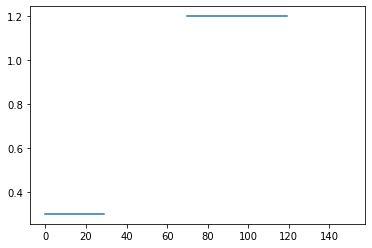

In [86]:
plt.plot(listateoric)

In [87]:
df_kcteoric = pd.DataFrame (listateoric, columns = ['Kcteoric'])

<AxesSubplot:>

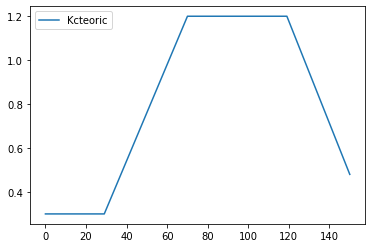

In [88]:
df_kcteoric.interpolate(method="linear").plot()

In [89]:
df_kcteoric=df_kcteoric.interpolate(method="linear")

<AxesSubplot:xlabel='Days', ylabel='Kc'>

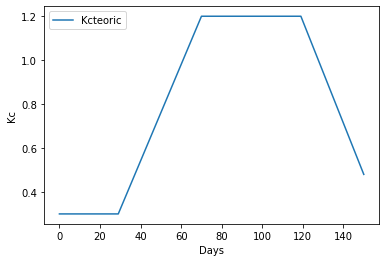

In [90]:
df_kcteoric.plot(xlabel="Days",ylabel="Kc")

# Criação do período melhor representativo utilizando a correlação de Pearson

In [91]:
import scipy.stats as stats

In [92]:
z=np.arange(151)
i=0
maxi=[]
corrP=[]
s=0

for z in windows:
    for xi in windows[i]:
        r, p = stats.pearsonr(xi,df_kcteoric['Kcteoric'])
        corrP.append(r)
    aws=np.array(corrP)
    maxi.append(aws.argmax())   
    i=i+1
    corrP=[]
max_array = np.array(maxi)

In [93]:
#max_array

In [94]:
lista_corr=[]
i=0
for x in max_array:
    lista_corr.append(windows[i][x])
    i=i+1

In [95]:
df_filtro3

,0,1,2,3,4,5,6,7,8,9,...,501,502,503,504,505,506,507,508,509,510
ID,,,,,,,,,,,,,,,,,,,,,
38882369,0.444905,0.425159,0.408209,0.395469,0.387502,0.384222,0.385071,0.389174,0.395487,0.402913,...,0.956100,0.901662,0.853111,0.824390,0.825020,0.856253,0.906624,0.946890,0.924373,0.756688
37120139,0.818436,0.823106,0.818040,0.808615,0.798211,0.788662,0.780662,0.774119,0.768467,0.762927,...,0.901896,0.892013,0.879254,0.863544,0.844579,0.821574,0.792944,0.755948,0.706266,0.637528
43757218,0.856401,0.848525,0.839351,0.828884,0.817218,0.804508,0.790952,0.776763,0.762159,0.747347,...,0.262354,0.270186,0.277192,0.283120,0.287719,0.290749,0.291989,0.291251,0.288387,0.283306
36869322,0.728273,0.768318,0.784035,0.774684,0.742258,0.690669,0.625022,0.550984,0.474239,0.400040,...,0.946687,0.909168,0.876407,0.857765,0.859272,0.881157,0.915016,0.940621,0.922367,0.805361
36282598,0.529204,0.524523,0.514682,0.502552,0.490284,0.479416,0.470975,0.465565,0.463456,0.464656,...,0.932902,0.885075,0.842825,0.819057,0.822634,0.854854,0.905356,0.947491,0.933118,0.786851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593544,0.233478,0.224459,0.218332,0.214736,0.213205,0.213219,0.214242,0.215753,0.217278,0.218409,...,0.867138,0.874479,0.879742,0.882159,0.881025,0.875787,0.866150,0.852192,0.834496,0.814296
43483421,0.881733,0.879479,0.877837,0.876706,0.875887,0.875124,0.874140,0.872668,0.870472,0.867370,...,0.471905,0.507431,0.538590,0.564722,0.585030,0.598451,0.603493,0.598061,0.579250,0.543117
1360573,0.498971,0.504017,0.505665,0.504317,0.500340,0.494067,0.485808,0.475855,0.464486,0.451970,...,0.171321,0.170940,0.171597,0.173686,0.177568,0.183521,0.191686,0.201999,0.214126,0.227381


In [96]:
df_filtro2

ID,38882369,37120139,43757218,36869322,36282598,43757221,44591780,43298258,1363779,35456588,...,35346187,43895981,43445082,39750965,30116037,44593544,43483421,1360573,43052734,40444006
0,0.444905,0.818436,0.856401,0.728273,0.529204,0.810490,0.712180,0.603318,0.887146,0.183526,...,0.285544,0.662968,0.917516,0.737594,0.779538,0.233478,0.881733,0.498971,0.724360,0.927271
1,0.425159,0.823106,0.848525,0.768318,0.524523,0.807524,0.708568,0.702626,0.915669,0.182837,...,0.407642,0.652115,0.887600,0.734584,0.768786,0.224459,0.879479,0.504017,0.724548,0.930922
2,0.408209,0.818040,0.839351,0.784035,0.514682,0.799946,0.700200,0.759952,0.923907,0.182187,...,0.519428,0.639034,0.884331,0.735648,0.756968,0.218332,0.877837,0.505665,0.725384,0.928315
3,0.395469,0.808615,0.828884,0.774684,0.502552,0.788364,0.688342,0.776505,0.913503,0.181848,...,0.614392,0.623079,0.892938,0.737086,0.745418,0.214736,0.876706,0.504317,0.725551,0.924075
4,0.387502,0.798211,0.817218,0.742258,0.490284,0.773518,0.674085,0.756798,0.887663,0.181934,...,0.689212,0.604342,0.904003,0.736680,0.734961,0.213205,0.875887,0.500340,0.724295,0.920702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.856253,0.821574,0.290749,0.881157,0.854854,0.278033,0.309743,0.881407,0.645904,0.269736,...,0.240766,0.208076,0.189504,0.268935,0.189987,0.875787,0.598451,0.183521,0.412358,0.692510
507,0.906624,0.792944,0.291989,0.915016,0.905356,0.279351,0.301598,0.916118,0.667289,0.274338,...,0.249311,0.216595,0.191809,0.265462,0.196601,0.866150,0.603493,0.191686,0.429549,0.679120
508,0.946890,0.755948,0.291251,0.940621,0.947491,0.280845,0.289242,0.942665,0.678814,0.274871,...,0.254101,0.222231,0.191169,0.260030,0.201522,0.852192,0.598061,0.201999,0.442244,0.660907
509,0.924373,0.706266,0.288387,0.922367,0.933118,0.282521,0.273667,0.925649,0.671095,0.269772,...,0.250370,0.220374,0.186585,0.252979,0.203411,0.834496,0.579250,0.214126,0.444118,0.638521


In [97]:
df_melhor= pd.DataFrame(data=lista_corr, index=df_filtro3.index)

In [98]:
df_train_melhor=df_melhor[:-143]

In [99]:
df_train_melhor2=df_train_melhor.T

In [100]:
df_train_melhor2

ID,38882369,37120139,43757218,36869322,36282598,43757221,44591780,43298258,1363779,35456588,...,43340810,43671341,36821574,42727365,33607518,36898223,18031041,43467121,38047572,38058636
0,0.262293,0.705819,0.242098,0.593949,0.407061,0.300578,0.237018,0.600678,0.219143,0.219049,...,0.320941,0.190499,0.188258,0.180102,0.183140,0.213131,0.185233,0.262001,0.426618,0.199002
1,0.251822,0.707659,0.234520,0.505489,0.417087,0.289105,0.228584,0.506929,0.212415,0.204326,...,0.329835,0.188605,0.193056,0.183583,0.178885,0.202666,0.182965,0.241202,0.355637,0.196998
2,0.240666,0.709282,0.226762,0.419606,0.429945,0.277715,0.219934,0.411048,0.204857,0.191756,...,0.338721,0.187307,0.196810,0.187452,0.174071,0.192486,0.181129,0.222113,0.295962,0.194994
3,0.229960,0.712742,0.218737,0.343039,0.445793,0.266279,0.211205,0.326632,0.197490,0.181952,...,0.348246,0.186474,0.201076,0.191271,0.169100,0.183823,0.179749,0.205976,0.250365,0.192992
4,0.221054,0.715953,0.210459,0.281076,0.464414,0.254615,0.202617,0.264539,0.190465,0.175100,...,0.359218,0.185961,0.205115,0.194571,0.163070,0.177653,0.178795,0.193218,0.219562,0.190836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.468108,0.590467,0.442069,0.196191,0.714140,0.423829,0.580909,0.197583,0.837024,0.577610,...,0.862013,0.542316,0.334400,0.487535,0.662548,0.499965,0.482553,0.650129,0.807230,0.320951
147,0.421866,0.586951,0.440871,0.191317,0.676525,0.411685,0.591690,0.192376,0.832484,0.554528,...,0.862273,0.532808,0.324464,0.469671,0.623736,0.500554,0.451935,0.620954,0.799486,0.306231
148,0.369556,0.583641,0.444632,0.187943,0.598471,0.405921,0.599320,0.188607,0.826059,0.530375,...,0.862276,0.523348,0.314823,0.452356,0.588345,0.494822,0.422832,0.594125,0.789090,0.292044
149,0.318204,0.580495,0.449486,0.188024,0.497999,0.406370,0.599466,0.189423,0.817549,0.505818,...,0.861785,0.513689,0.305456,0.435139,0.550119,0.482038,0.403906,0.572626,0.776189,0.278133


In [101]:
df_melhor2=df_melhor.T

In [102]:
df_melhor2

ID,38882369,37120139,43757218,36869322,36282598,43757221,44591780,43298258,1363779,35456588,...,35346187,43895981,43445082,39750965,30116037,44593544,43483421,1360573,43052734,40444006
0,0.262293,0.705819,0.242098,0.593949,0.407061,0.300578,0.237018,0.600678,0.219143,0.219049,...,0.159375,0.333951,0.234838,0.129542,0.329152,0.518999,0.167263,0.282358,0.255069,0.203496
1,0.251822,0.707659,0.234520,0.505489,0.417087,0.289105,0.228584,0.506929,0.212415,0.204326,...,0.164193,0.290094,0.233992,0.133496,0.316431,0.473709,0.165452,0.280089,0.241551,0.200404
2,0.240666,0.709282,0.226762,0.419606,0.429945,0.277715,0.219934,0.411048,0.204857,0.191756,...,0.168889,0.249680,0.233182,0.137008,0.300548,0.428507,0.163806,0.273531,0.230190,0.196804
3,0.229960,0.712742,0.218737,0.343039,0.445793,0.266279,0.211205,0.326632,0.197490,0.181952,...,0.172413,0.216961,0.232393,0.139858,0.282886,0.386364,0.162595,0.261892,0.220636,0.192520
4,0.221054,0.715953,0.210459,0.281076,0.464414,0.254615,0.202617,0.264539,0.190465,0.175100,...,0.173132,0.192013,0.231610,0.141770,0.265051,0.350065,0.161659,0.245603,0.212298,0.188358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,0.468108,0.590467,0.442069,0.196191,0.714140,0.423829,0.580909,0.197583,0.837024,0.577610,...,0.593458,0.683502,0.167461,0.430313,0.430495,0.403322,0.655023,0.589953,0.525503,0.351573
147,0.421866,0.586951,0.440871,0.191317,0.676525,0.411685,0.591690,0.192376,0.832484,0.554528,...,0.577354,0.665113,0.165094,0.407669,0.422762,0.398091,0.651435,0.575457,0.518527,0.330591
148,0.369556,0.583641,0.444632,0.187943,0.598471,0.405921,0.599320,0.188607,0.826059,0.530375,...,0.560708,0.647970,0.162999,0.387098,0.419584,0.391656,0.640117,0.562591,0.512299,0.309941
149,0.318204,0.580495,0.449486,0.188024,0.497999,0.406370,0.599466,0.189423,0.817549,0.505818,...,0.544494,0.632232,0.161572,0.369844,0.420377,0.383789,0.624575,0.550757,0.506404,0.289790


In [103]:
df_test_melhor=df_melhor[-143:]

In [104]:
df_test_melhor

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
ID,,,,,,,,,,,,,,,,,,,,,
39208365,0.129020,0.130153,0.131192,0.132062,0.133165,0.134876,0.137022,0.139386,0.142127,0.144873,...,0.476661,0.457119,0.441110,0.427926,0.416639,0.406609,0.398736,0.391790,0.385130,0.378234
34472851,0.182982,0.181633,0.182121,0.184730,0.189530,0.196360,0.204838,0.214437,0.224575,0.235048,...,0.635201,0.626620,0.617406,0.607256,0.596737,0.585859,0.575092,0.564954,0.556130,0.547592
38811083,0.207728,0.219335,0.229968,0.239570,0.248541,0.257598,0.267431,0.278101,0.288101,0.298099,...,0.706619,0.696234,0.687866,0.680512,0.673277,0.665423,0.656487,0.648401,0.640522,0.632497
5751252,0.132551,0.133451,0.136346,0.140725,0.145959,0.151411,0.156550,0.161083,0.165052,0.168654,...,0.652274,0.645953,0.641758,0.638788,0.636001,0.632491,0.627777,0.623018,0.618034,0.613076
24598408,0.207210,0.202456,0.198723,0.195395,0.193286,0.192081,0.191033,0.189423,0.186844,0.183313,...,0.732360,0.710618,0.686253,0.661210,0.636100,0.611896,0.589298,0.568068,0.548883,0.531159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44593544,0.518999,0.473709,0.428507,0.386364,0.350065,0.320605,0.298485,0.283377,0.274316,0.270513,...,0.441814,0.430123,0.420930,0.414735,0.408485,0.403322,0.398091,0.391656,0.383789,0.376367
43483421,0.167263,0.165452,0.163806,0.162595,0.161659,0.161078,0.161022,0.161614,0.162612,0.164457,...,0.628544,0.627334,0.633130,0.642406,0.651046,0.655023,0.651435,0.640117,0.624575,0.606083
1360573,0.282358,0.280089,0.273531,0.261892,0.245603,0.224856,0.201513,0.178266,0.157885,0.142608,...,0.680155,0.660701,0.641364,0.622990,0.605903,0.589953,0.575457,0.562591,0.550757,0.541289


<AxesSubplot:>

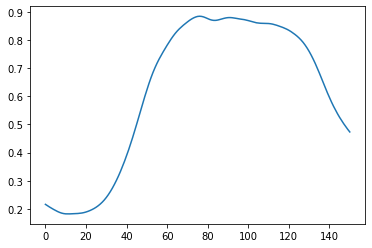

In [105]:
df_test_melhor.mean().plot()

In [106]:
array_test_mean=df_test_melhor.mean().values

In [107]:
df_test_melhor.mean().values

array([0.21658125, 0.21180808, 0.20725032, 0.20292778, 0.19873983,
       0.19479395, 0.19113448, 0.18800819, 0.18552978, 0.18383697,
       0.18289961, 0.18266409, 0.18278447, 0.18306846, 0.18337478,
       0.18372041, 0.18419136, 0.18488071, 0.18590993, 0.18740711,
       0.18941672, 0.19187315, 0.19477514, 0.1981441 , 0.20196944,
       0.20641566, 0.21157241, 0.21749848, 0.22426443, 0.23203296,
       0.24090666, 0.25088434, 0.26195733, 0.27416959, 0.28747153,
       0.30176581, 0.31715142, 0.33362351, 0.35116555, 0.36970078,
       0.38925092, 0.40984109, 0.4314344 , 0.45401917, 0.477506  ,
       0.50163322, 0.52613882, 0.55086825, 0.57545514, 0.59954499,
       0.62264927, 0.64461163, 0.66521153, 0.68415551, 0.70135384,
       0.71704375, 0.73143196, 0.74467313, 0.75721596, 0.76939754,
       0.78125945, 0.79266087, 0.80361041, 0.8138346 , 0.82321699,
       0.83161224, 0.83912978, 0.84591614, 0.85217827, 0.85805645,
       0.86370305, 0.86911228, 0.87385716, 0.87787724, 0.88101

In [108]:
seed=0

In [109]:
from tslearn.clustering import TimeSeriesKMeans

modelteste2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
modelteste2.fit(df_test_melhor)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

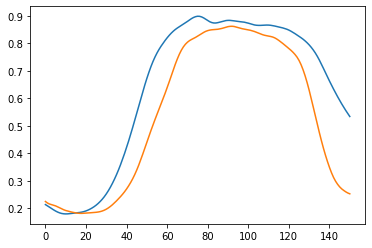

In [110]:
for x in modelteste2.cluster_centers_:
    plt.plot(x)

In [111]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(df_test_melhor, labels=modelteste2.labels_, metric="euclidean")

0.4176305079437156

In [112]:
modelteste2.inertia_

0.8156663136237928

In [113]:
modelteste2.cluster_centers_

array([[[0.21414177],
        [0.20957148],
        [0.20475972],
        [0.19990575],
        [0.19512069],
        [0.19074384],
        [0.1869737 ],
        [0.18398883],
        [0.18183501],
        [0.18063166],
        [0.18020918],
        [0.18045786],
        [0.18116135],
        [0.18203235],
        [0.18286292],
        [0.18368653],
        [0.18458307],
        [0.18559354],
        [0.18692085],
        [0.18872162],
        [0.19112582],
        [0.19411491],
        [0.19768461],
        [0.20183593],
        [0.20656287],
        [0.21203411],
        [0.21833836],
        [0.22548765],
        [0.23352738],
        [0.24264843],
        [0.25294857],
        [0.26442344],
        [0.27708038],
        [0.29098214],
        [0.30608646],
        [0.32234942],
        [0.33988839],
        [0.35870133],
        [0.37874004],
        [0.3998577 ],
        [0.42199692],
        [0.44519141],
        [0.46938131],
        [0.49446491],
        [0.52028191],
        [0

In [114]:
cluster_centersteste=[]
for x in modelteste2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centersteste.append(abc)

In [115]:
x=np.arange(0,151)

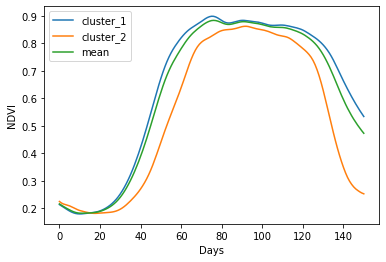

In [116]:
plt.plot(x, cluster_centersteste[0], "tab:blue", label="cluster_1")
plt.plot(x, cluster_centersteste[1], "tab:orange", label="cluster_2")
plt.plot(x, array_test_mean, "tab:green", label="mean")
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("NDVI")
plt.show()

<AxesSubplot:>

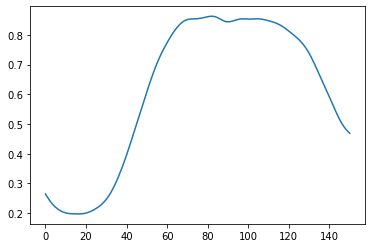

In [117]:
df_train_melhor.mean().plot()

In [118]:
df_train_melhor.mean().values

array([0.26432516, 0.25347244, 0.24330939, 0.23420474, 0.22632177,
       0.21969241, 0.21417375, 0.20959658, 0.2058541 , 0.2029022 ,
       0.20070541, 0.1991991 , 0.19829351, 0.19780686, 0.19754923,
       0.19737845, 0.19731299, 0.19744161, 0.1978541 , 0.19871471,
       0.20013792, 0.20218999, 0.20482878, 0.20798527, 0.21161733,
       0.21568464, 0.22023871, 0.2254049 , 0.23131645, 0.23820438,
       0.24631076, 0.25573157, 0.26654175, 0.27871349, 0.29218054,
       0.3068351 , 0.32261878, 0.33940772, 0.35718522, 0.3759544 ,
       0.39560921, 0.41600383, 0.43699864, 0.45844214, 0.48005879,
       0.50179309, 0.52351325, 0.54510311, 0.56649804, 0.58770189,
       0.60864979, 0.62918791, 0.6491945 , 0.66850837, 0.68684442,
       0.70397342, 0.7199418 , 0.73480015, 0.74861164, 0.7615413 ,
       0.77382624, 0.78554546, 0.79673492, 0.80728329, 0.81697644,
       0.82569654, 0.83335429, 0.83978492, 0.84491003, 0.84874541,
       0.85122622, 0.85258862, 0.85319352, 0.85341995, 0.85359

In [119]:
array_train_mean=df_train_melhor.mean().values

In [120]:
seed=0

In [121]:
from tslearn.clustering import TimeSeriesKMeans

model2 = TimeSeriesKMeans(n_clusters=2, metric="euclidean",
                         max_iter=1000,n_init=10, random_state=seed)
model2.fit(df_train_melhor)

TimeSeriesKMeans(max_iter=1000, n_clusters=2, n_init=10, random_state=0)

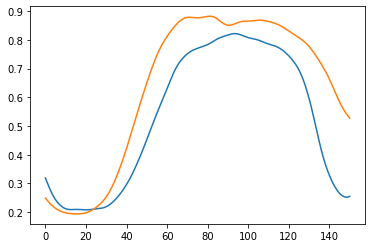

In [122]:
for x in model2.cluster_centers_:
    plt.plot(x)

In [123]:
import tslearn.clustering
from tslearn.metrics import cdist_dtw
tslearn.clustering.silhouette_score(df_train_melhor, labels=model2.labels_, metric="euclidean")

0.3651456848209736

In [124]:
model2.inertia_

1.3123823566707955

In [125]:
model2.cluster_centers_

array([[[0.31912054],
        [0.3009974 ],
        [0.2838825 ],
        [0.26835248],
        [0.25468435],
        [0.24325552],
        [0.23378475],
        [0.22608002],
        [0.21995754],
        [0.21525225],
        [0.21190811],
        [0.20998128],
        [0.20912171],
        [0.20903767],
        [0.2093515 ],
        [0.20957933],
        [0.20954178],
        [0.209259  ],
        [0.2088109 ],
        [0.20836205],
        [0.20816227],
        [0.20833889],
        [0.20893128],
        [0.20975784],
        [0.2106816 ],
        [0.21149042],
        [0.21231043],
        [0.21324229],
        [0.21441342],
        [0.216274  ],
        [0.2192077 ],
        [0.22316225],
        [0.22807986],
        [0.23391501],
        [0.24059699],
        [0.24803173],
        [0.25630419],
        [0.26532311],
        [0.27507861],
        [0.28554728],
        [0.29678139],
        [0.30881361],
        [0.32185411],
        [0.33581666],
        [0.35074714],
        [0

In [126]:
cluster_centers=[]
for x in model2.cluster_centers_:
    abc=np.concatenate(x, axis=0)
    cluster_centers.append(abc)

In [127]:
cluster_centers[0]

array([0.31912054, 0.3009974 , 0.2838825 , 0.26835248, 0.25468435,
       0.24325552, 0.23378475, 0.22608002, 0.21995754, 0.21525225,
       0.21190811, 0.20998128, 0.20912171, 0.20903767, 0.2093515 ,
       0.20957933, 0.20954178, 0.209259  , 0.2088109 , 0.20836205,
       0.20816227, 0.20833889, 0.20893128, 0.20975784, 0.2106816 ,
       0.21149042, 0.21231043, 0.21324229, 0.21441342, 0.216274  ,
       0.2192077 , 0.22316225, 0.22807986, 0.23391501, 0.24059699,
       0.24803173, 0.25630419, 0.26532311, 0.27507861, 0.28554728,
       0.29678139, 0.30881361, 0.32185411, 0.33581666, 0.35074714,
       0.36651165, 0.38287673, 0.39968799, 0.41706195, 0.43494752,
       0.4531561 , 0.47168079, 0.49051624, 0.50928842, 0.52752443,
       0.54520522, 0.56253016, 0.57976944, 0.59700966, 0.6143329 ,
       0.63189953, 0.64936946, 0.6664236 , 0.68246746, 0.69716276,
       0.70999193, 0.72102552, 0.7303369 , 0.73838309, 0.74545633,
       0.75164057, 0.75697474, 0.76142057, 0.76499267, 0.76796

In [128]:
cluster_centers2=cluster_centers

In [129]:
cluster_centers2[0]

array([0.31912054, 0.3009974 , 0.2838825 , 0.26835248, 0.25468435,
       0.24325552, 0.23378475, 0.22608002, 0.21995754, 0.21525225,
       0.21190811, 0.20998128, 0.20912171, 0.20903767, 0.2093515 ,
       0.20957933, 0.20954178, 0.209259  , 0.2088109 , 0.20836205,
       0.20816227, 0.20833889, 0.20893128, 0.20975784, 0.2106816 ,
       0.21149042, 0.21231043, 0.21324229, 0.21441342, 0.216274  ,
       0.2192077 , 0.22316225, 0.22807986, 0.23391501, 0.24059699,
       0.24803173, 0.25630419, 0.26532311, 0.27507861, 0.28554728,
       0.29678139, 0.30881361, 0.32185411, 0.33581666, 0.35074714,
       0.36651165, 0.38287673, 0.39968799, 0.41706195, 0.43494752,
       0.4531561 , 0.47168079, 0.49051624, 0.50928842, 0.52752443,
       0.54520522, 0.56253016, 0.57976944, 0.59700966, 0.6143329 ,
       0.63189953, 0.64936946, 0.6664236 , 0.68246746, 0.69716276,
       0.70999193, 0.72102552, 0.7303369 , 0.73838309, 0.74545633,
       0.75164057, 0.75697474, 0.76142057, 0.76499267, 0.76796

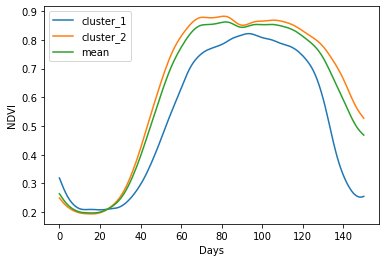

In [130]:
x=np.arange(0,151)

plt.plot(x, cluster_centers[0], "tab:blue", label="cluster_1")
plt.plot(x, cluster_centers[1], "tab:orange", label="cluster_2")
plt.plot(x, array_train_mean, "tab:green", label="mean")
plt.legend(loc="upper left")
plt.xlabel("Days")
plt.ylabel("NDVI")
plt.show()

# Models

# Mean

## Linear

In [131]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_train_melhor.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=df_kcteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(X, y)
pred = Reg.predict(X)
print(Reg.coef_)
print(Reg.intercept_)

[1.39845571]
-0.028467284561805473


In [132]:
Reg.score(X, y)

0.9780484073231557

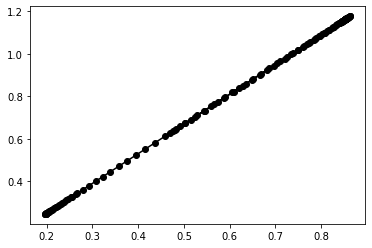

In [133]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [134]:
print(r2)
print(mse)

0.9780484073231557
0.002824832964804645


In [135]:
print(np.sqrt(mse))

0.05314915770550503


In [136]:
pred

array([0.34117974, 0.32600269, 0.31179012, 0.29905767, 0.28803369,
       0.27876282, 0.27104522, 0.26464425, 0.25941056, 0.25528246,
       0.25221035, 0.25010383, 0.24883741, 0.24815685, 0.24779656,
       0.24755773, 0.24746619, 0.24764607, 0.24822291, 0.24942644,
       0.25141674, 0.25428646, 0.25797669, 0.2623909 , 0.26747018,
       0.27315813, 0.2795268 , 0.28675148, 0.29501853, 0.304651  ,
       0.31598741, 0.32916199, 0.34427955, 0.36130119, 0.38013426,
       0.40062801, 0.42270079, 0.44617938, 0.47104043, 0.49728829,
       0.52477467, 0.55329565, 0.58265596, 0.61264375, 0.64287367,
       0.67326813, 0.70364281, 0.73383528, 0.76375513, 0.79340778,
       0.8227025 , 0.85142414, 0.87940247, 0.90641206, 0.93205422,
       0.95600837, 0.97833943, 0.99911818, 1.01843294, 1.03651449,
       1.05369444, 1.07008325, 1.08573122, 1.10048265, 1.11403808,
       1.12623276, 1.13694178, 1.14593474, 1.15310197, 1.15846559,
       1.16193489, 1.16384015, 1.16468607, 1.16500272, 1.16524

In [137]:
y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.32195122, 0.34390244, 0.36585366, 0.38780488, 0.4097561 ,
       0.43170732, 0.45365854, 0.47560976, 0.49756098, 0.5195122 ,
       0.54146341, 0.56341463, 0.58536585, 0.60731707, 0.62926829,
       0.65121951, 0.67317073, 0.69512195, 0.71707317, 0.73902439,
       0.76097561, 0.78292683, 0.80487805, 0.82682927, 0.84878049,
       0.87073171, 0.89268293, 0.91463415, 0.93658537, 0.95853659,
       0.9804878 , 1.00243902, 1.02439024, 1.04634146, 1.06829268,
       1.0902439 , 1.11219512, 1.13414634, 1.15609756, 1.17804878,
       1.2       , 1.2       , 1.2       , 1.2       , 1.2    

In [138]:
frameplotazul = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': X.reshape(151,)}

plotazul = pd.DataFrame(frameplotazul)

<AxesSubplot:>

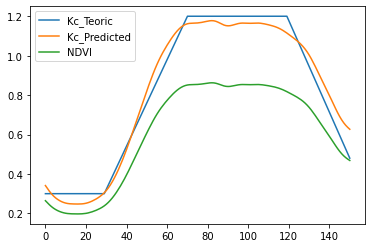

In [139]:
plotazul.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

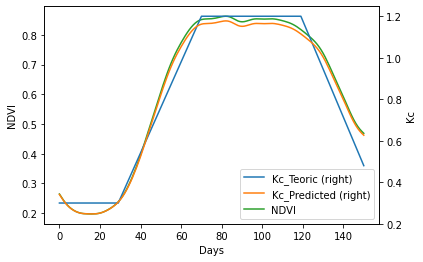

In [140]:
plt.figure()
ax = plotazul.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [141]:
#plt.scatter(y,pred)
#plt.plot(y,pred,color="red")
#plt.show()

In [142]:
#statsmodels

In [143]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(X)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     6639.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          1.81e-125
Time:                        18:27:55   Log-Likelihood:                 228.87
No. Observations:                 151   AIC:                            -453.7
Df Residuals:                     149   BIC:                            -447.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0285      0.011     -2.508      0.0

In [144]:
result.resid.mean()

-1.4447604260850548e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [145]:
pred2 = Reg.predict(np.array(array_test_mean).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [146]:
r2

0.9727004129251594

In [147]:
rmse

0.059270884408187355

In [148]:
array_test_mean

array([0.21658125, 0.21180808, 0.20725032, 0.20292778, 0.19873983,
       0.19479395, 0.19113448, 0.18800819, 0.18552978, 0.18383697,
       0.18289961, 0.18266409, 0.18278447, 0.18306846, 0.18337478,
       0.18372041, 0.18419136, 0.18488071, 0.18590993, 0.18740711,
       0.18941672, 0.19187315, 0.19477514, 0.1981441 , 0.20196944,
       0.20641566, 0.21157241, 0.21749848, 0.22426443, 0.23203296,
       0.24090666, 0.25088434, 0.26195733, 0.27416959, 0.28747153,
       0.30176581, 0.31715142, 0.33362351, 0.35116555, 0.36970078,
       0.38925092, 0.40984109, 0.4314344 , 0.45401917, 0.477506  ,
       0.50163322, 0.52613882, 0.55086825, 0.57545514, 0.59954499,
       0.62264927, 0.64461163, 0.66521153, 0.68415551, 0.70135384,
       0.71704375, 0.73143196, 0.74467313, 0.75721596, 0.76939754,
       0.78125945, 0.79266087, 0.80361041, 0.8138346 , 0.82321699,
       0.83161224, 0.83912978, 0.84591614, 0.85217827, 0.85805645,
       0.86370305, 0.86911228, 0.87385716, 0.87787724, 0.88101

In [149]:
frameplotazulteste = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': array_test_mean}

plotazulteste = pd.DataFrame(frameplotazulteste)

<AxesSubplot:>

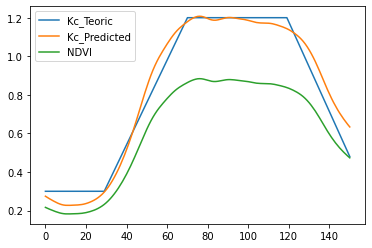

In [150]:
plotazulteste.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

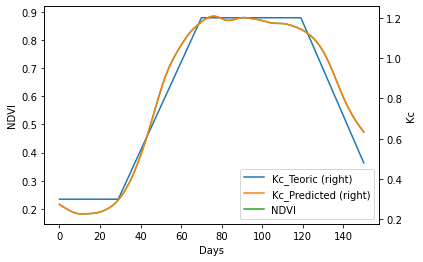

In [151]:
plt.figure()
ax = plotazulteste.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

## Polinomial

In [152]:
X2=X.reshape(151,)

In [153]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(X2, y, 5))

print(r2_score(y, mymodel(X2)))

0.9940619551916364


In [154]:
print(mymodel)

        5         4         3         2
-49.67 x + 131.4 x - 129.6 x + 59.58 x - 11.65 x + 1.083


In [155]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(X2))))

RMSE for Polynomial Regression=> 0.027642995546173978


In [156]:
r2_score(y,mymodel(X2))

0.9940619551916364

In [157]:
print(metrics.mean_absolute_error(y,mymodel(X2)))
print(metrics.mean_squared_error(y,mymodel(X2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(X2))))

0.0193183423276991
0.0007641352027657943
0.13899043969891994


In [158]:
frameplotazul4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(X2), 'NDVI': X2.reshape(151,)}
plotazul4 = pd.DataFrame(frameplotazul4)

<AxesSubplot:>

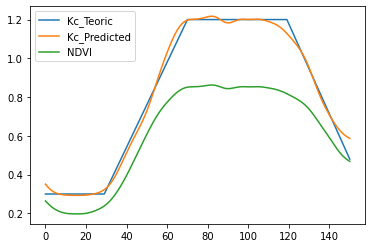

In [159]:
plotazul4.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

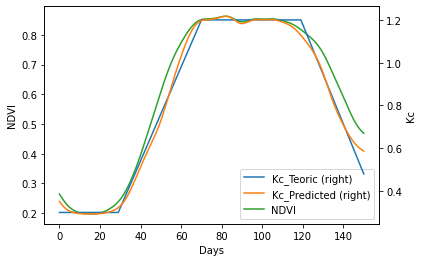

In [160]:
plt.figure()
ax = plotazul4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [161]:
pred2 = mymodel(array_test_mean)
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [162]:
r2

0.9903261823360547

In [163]:
rmse

0.035282741045401425

In [164]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(array_test_mean), 'NDVI': array_test_mean}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

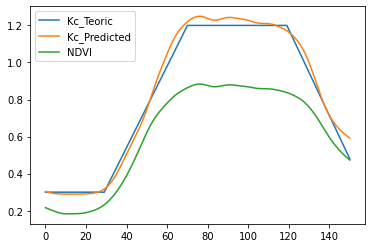

In [165]:
plotazulteste2.plot()

Text(0.5, 1.0, 'Mean 10% Max (Polynomial)')

<Figure size 432x288 with 0 Axes>

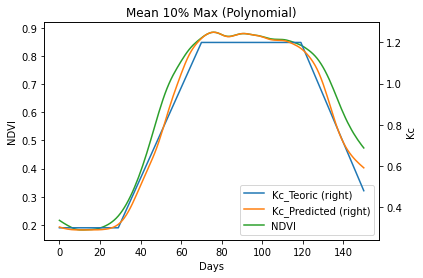

In [166]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("Mean 10% Max (Polynomial)")

# Cluster

In [167]:
red=cluster_centers2[1].reshape(-1,1)

In [168]:
red2=cluster_centers2[1]

## Linear

In [169]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics

#X = NDVIbluesync.iloc[:,:-1].values
X=df_train_melhor.mean().values.reshape(-1,1)
#y = NDVIbluesync.iloc[:,1].values
y=df_kcteoric['Kcteoric'].values
Reg = linear_model.LinearRegression()
Reg.fit(red, y)
pred = Reg.predict(red)
print(Reg.coef_)
print(Reg.intercept_)

[1.3413729]
-0.024881020793304565


In [170]:
Reg.score(red, y)

0.9529636391996981

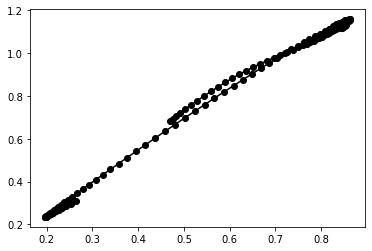

In [171]:
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)
plt.plot(X, pred, color = 'Black', marker = 'o')

In [172]:
print(r2)
print(mse)

0.9529636391996981
0.006052857507386963


In [173]:
print(np.sqrt(mse))

0.07780011251525902


In [174]:
pred

array([0.30955562, 0.29766792, 0.28658835, 0.27673514, 0.26828557,
       0.26115558, 0.25520429, 0.2502131 , 0.24606703, 0.24275131,
       0.24022593, 0.23835981, 0.23712819, 0.23632756, 0.23577213,
       0.23539667, 0.23529862, 0.23562223, 0.23649155, 0.23812682,
       0.24063187, 0.24407315, 0.24836423, 0.25345385, 0.25932035,
       0.26597271, 0.27345264, 0.28193735, 0.29160773, 0.30269316,
       0.31546634, 0.33011047, 0.34677483, 0.3654286 , 0.38598454,
       0.40829303, 0.43222311, 0.45759664, 0.48438874, 0.51261332,
       0.54207   , 0.57249763, 0.60358048, 0.63509137, 0.66654264,
       0.69788868, 0.72899   , 0.75970486, 0.78988001, 0.81954081,
       0.8486457 , 0.87693434, 0.90420071, 0.93030673, 0.95493895,
       0.9777127 , 0.99863409, 1.01769036, 1.03495762, 1.0506877 ,
       1.06522685, 1.07883491, 1.09169053, 1.10382177, 1.114987  ,
       1.12517499, 1.1342072 , 1.14177521, 1.14757721, 1.15153289,
       1.1535006 , 1.15386958, 1.1532705 , 1.15234564, 1.15154

In [175]:
y

array([0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.3       , 0.3       , 0.3       , 0.3       , 0.3       ,
       0.32195122, 0.34390244, 0.36585366, 0.38780488, 0.4097561 ,
       0.43170732, 0.45365854, 0.47560976, 0.49756098, 0.5195122 ,
       0.54146341, 0.56341463, 0.58536585, 0.60731707, 0.62926829,
       0.65121951, 0.67317073, 0.69512195, 0.71707317, 0.73902439,
       0.76097561, 0.78292683, 0.80487805, 0.82682927, 0.84878049,
       0.87073171, 0.89268293, 0.91463415, 0.93658537, 0.95853659,
       0.9804878 , 1.00243902, 1.02439024, 1.04634146, 1.06829268,
       1.0902439 , 1.11219512, 1.13414634, 1.15609756, 1.17804878,
       1.2       , 1.2       , 1.2       , 1.2       , 1.2    

In [176]:
frameplotred = { 'Kc_Teoric': y, 'Kc_Predicted': pred, 'NDVI': red.reshape(151,)}

plotred = pd.DataFrame(frameplotred)

<AxesSubplot:>

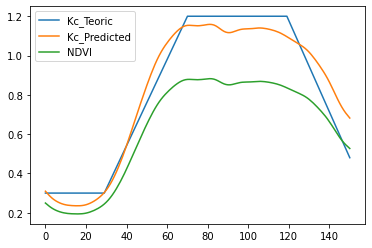

In [177]:
plotred.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

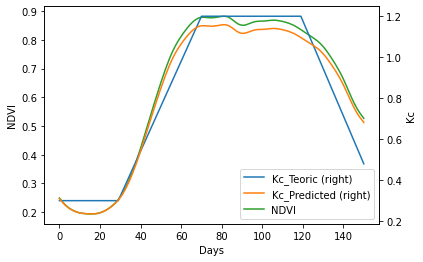

In [178]:
plt.figure()
ax = plotred.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

In [179]:
#plt.scatter(y,pred)
#plt.plot(y,pred,color="red")
#plt.show()

In [180]:
#statsmodels

In [181]:
import statsmodels.api as sm
#performing the regression
Xa = sm.add_constant(red)
result = sm.OLS(y, Xa).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     3019.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):          8.34e-101
Time:                        18:27:58   Log-Likelihood:                 171.34
No. Observations:                 151   AIC:                            -338.7
Df Residuals:                     149   BIC:                            -332.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0249      0.017     -1.486      0.1

In [182]:
result.resid.mean()

-3.957467172215169e-16

__Explain the Statistics__

__Model : OLS : Ordinary Least Squares : One way to create a linear regression model. Minimize the dependent samples so you can estimate the unknown samples when creating a linear regression model.__

__Method : Least Squares : Fit data to the model by minimizing the residual samples__

__R-quared : Measure of how well the regression line approximates the data points. If .5 then that is a sign that half of the observed variation can be explained by the models inputs. 1 would be perfectly correlated.__

__Adj, R-squared : Reflects the fit of the model. Values range from 0 to 1, where higher values indicate a good fit.__

__F-statistic : Measures how significantly the data points fit into the regression model by measuring variation of sample means.__

__Prob (F-statistic) : Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.__

__Log-Likelihood : The conditional probability that the observed data fits the model__

__AIC : Adjusts the log-likelihood based on the number of observations and complexity of the model. It focuses on the data points that best describe the data.__

__Df Residuals : Degrees of freedom of the residuals which is the difference between predicted values and the measured data.__

__BIC : We want a low BIC. It focuses on the shortest description of the data like AIC.__

__Df Model : Number of parameters in the model__

__Coefficient Constant : Is your Y intercept. If both dependent and independent coefficients are zero then the expected output would equal the constant coefficient.__

__Independent Coefficient : Represents the change of the independent variable per unit.__

__Standard Error : Accuracy of the coefficients__

__P>|t| : The P Value. A P Value less than .05 is considered statistically significant.__

__[.025 - .975] : Confidence Interval : Represents the range in which coefficients are likely to fall.__

__Omnibus : (D’Angostino’s test) : Establishes whether the samples come from a normally distributed population.__

__Durbin-Watson : Test to see if the errors are not independent. Used to find repeating patterns that may be obstructed by noise. Its value lies between 0 and 4. If greater than 2 this is a sign that relationships between two variables are going in opposite directions (negatively correlated). If less than 2 variables are positively correlated.__

__Prob(Omnibus) : Probability of Omnibus__

__Jarque-Bera : Tests whether the samples match a normal distribution. It never has a negative number and the further it gets from zero signals the data doesn't have a normal distribution.__

__Skew : Measure of the asymmetry of the probability distribution. Negative skew indicates the tail is longer on the left and the concentration of the data is on the right. Positive indicates the tail is longer on the right. 0 indicates that the tails are balanced.__

__Prob(JB) : The probability of Jarque-Bera__

__Kurtosis : Describes the shape of a probability distribution with a focus on the tails and not the peak. If the value is high that is a sign that there are more outliers. If the value is less than 3 that means there are fewer outliers. A value of 3 points towards a normal distribution. Values greater than 3 indicate more outliers.__

__Condition Number : Represents whether samples are highly related in our regression model. A large number indicates strong multicollinearity which means that independent variables are highly correlated with each other. This causes problems because a small number of samples are so dramatically different from others that results are corrupted.__

# Linear-Mean Test (correcto)

In [183]:
pred2 = Reg.predict(np.array(cluster_centersteste[0]).reshape(-1,1))
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [184]:
r2

0.94659354908364

In [185]:
rmse

0.08290108749745183

In [186]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': pred2, 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

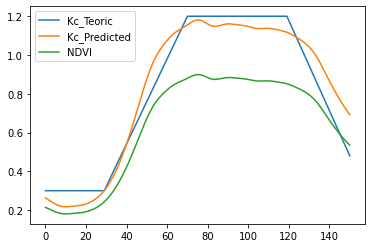

In [187]:
plotazulteste2.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

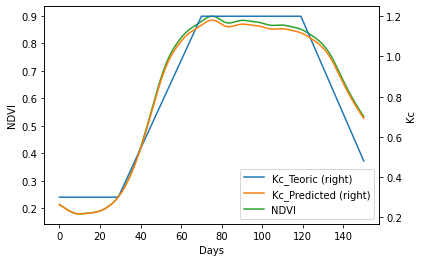

In [188]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

## Polinomial

In [189]:
X2=X.reshape(151,)

In [190]:
from sklearn.metrics import r2_score
mymodel = np.poly1d(np.polyfit(red2, y, 5))

print(r2_score(y, mymodel(red2)))

0.9902890554189653


In [191]:
print(mymodel)

        5         4         3         2
-91.92 x + 247.4 x - 248.3 x + 115.5 x - 23.81 x + 2.06


In [192]:
from sklearn.metrics import mean_squared_error
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,mymodel(red2))))

RMSE for Polynomial Regression=> 0.03535038160916788


In [193]:
r2_score(y,mymodel(red2))

0.9902890554189653

In [194]:
print(metrics.mean_absolute_error(y,mymodel(red2)))
print(metrics.mean_squared_error(y,mymodel(red2)))
print(np.sqrt(metrics.mean_absolute_error(y,mymodel(red2))))

0.023918981090947686
0.0012496494799137947
0.15465762538894642


In [195]:
frameplotred4 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(red2), 'NDVI': red2.reshape(151,)}
plotred4 = pd.DataFrame(frameplotazul4)

<AxesSubplot:>

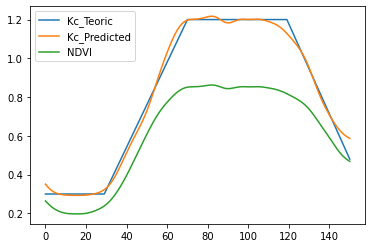

In [196]:
plotred4.plot()

Text(0.5, 0, 'Days')

<Figure size 432x288 with 0 Axes>

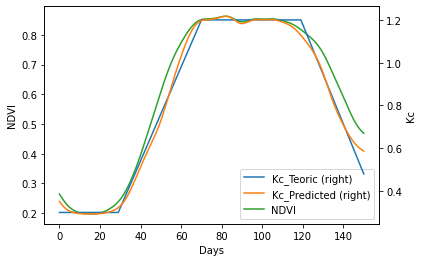

In [197]:
plt.figure()
ax = plotred4.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')

# Polynomial-Mean Test (correcto)

In [198]:
pred2 = mymodel(cluster_centersteste[0])
mse = mean_squared_error(y, pred2)
r2 = r2_score(y, pred2)
rmse=np.sqrt(mse)

In [199]:
r2

0.9887422075301637

In [200]:
rmse

0.03806185827253347

In [201]:
frameplotazulteste2 = { 'Kc_Teoric': y, 'Kc_Predicted': mymodel(cluster_centersteste[0]), 'NDVI': cluster_centersteste[0]}
plotazulteste2 = pd.DataFrame(frameplotazulteste2)

<AxesSubplot:>

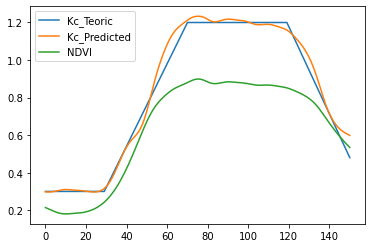

In [202]:
plotazulteste2.plot()

Text(0.5, 1.0, 'K-Means 10% Max (Polynomial)')

<Figure size 432x288 with 0 Axes>

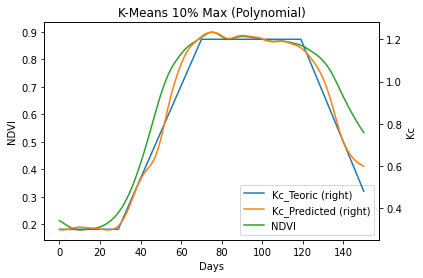

In [203]:
plt.figure()
ax = plotazulteste2.plot(secondary_y=["Kc_Teoric","Kc_Predicted"])
ax.set_ylabel('NDVI')
ax.right_ax.set_ylabel('Kc')
ax.set_xlabel('Days')
ax.set_title("K-Means 10% Max (Polynomial)")